Nivell 1

Exercici 1: Mostra les característiques principals de l'esquema creat i explica les diferents taules i variables que existeixen. Assegura't d'incloure un diagrama que il·lustri la relació entre les diferents taules i variables.

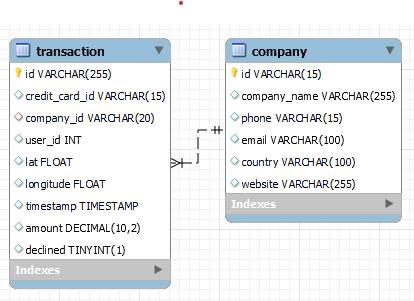

Hay dos tablas que se unen entre si por el ID de la tabla company con el company_id de la tabla transaction. Relacion 1 a N. En la tabla company aparecen los datos de las empresas: Nº identificacion(primary key) , nombre, telefono, email, pais y pagina web. Y en la tabla de transacciones aparecen:
el codigo de la transaccion (PK por lo que no se repite), id de la tarjeta bancaria, codido de la empresa (Foreign Key, campo que se une con la tabla company) , el id del usuario, la latitud, longitud , dia y hora , importe de la transaccion y si se ha declinado o no.  
La tabla de transacciones es la que tiene la informacion que podemos tratar por lo que la podemos considerar Tabla de Hechos, y la tabla company la tabla de Dimension.



Exercici 2

Realitza la següent consulta: Has d'obtenir el nom, email i país de cada companyia, ordena les dades en funció del nom de les companyies.

```
SELECT company_name, email, country 
FROM company
ORDER BY company_name;
```
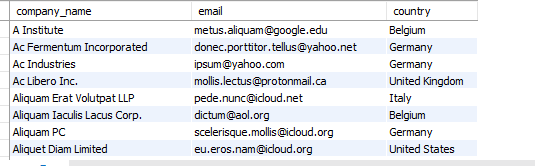






Exercici 3

Des de la secció de màrqueting et sol·liciten que els passis un llistat dels països que estan fent compres.

```
SELECT DISTINCT country 
FROM company
LEFT JOIN
transaction
ON company.id= transaction.company_id
WHERE amount >0
;
```
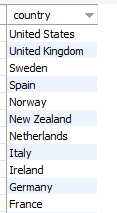




Exercici 4

Des de màrqueting també volen saber des de quants països es realitzen les compres.

```
SELECT COUNT(DISTINCT country)
FROM company
LEFT JOIN
transaction
ON company.id= transaction.company_id
WHERE amount >0;
````

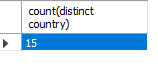





Exercici 5

El teu cap identifica un error amb la companyia que té aneu 'b-2354'. Per tant, et sol·licita que li indiquis el país i nom de companyia d'aquest aneu.

```
SELECT country, company_name
FROM company
WHERE id = 'b-2354';
```
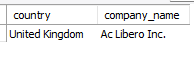



Exercici 6

A més, el teu cap et sol·licita que indiquis quina és la companyia amb major despesa mitjana?

```
SELECT company_name, AVG(amount)
from company
LEFT JOIN
transaction
ON company.id=transaction.company_id
GROUP BY company_name
ORDER BY AVG(amount) DESC
LIMIT 1;

```
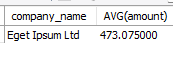


Nivell 2

Exercici 1

El teu cap està redactant un informe de tancament de l'any i et sol·licita que li enviïs informació rellevant per al document. Per a això et sol·licita verificar si en la base de dades existeixen companyies amb identificadors (aneu) duplicats.

```
SELECT id, COUNT(id)
FROM company
GROUP BY id
HAVING count(id)>1;
```
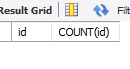




Exercici 2

En quin dia es van realitzar les cinc vendes més costoses? Mostra la data de la transacció i la sumatòria de la quantitat de diners.

```
SELECT DATE(timestamp), SUM(amount)
FROM transaction
GROUP BY date(timestamp)
ORDER BY SUM(amount) DESC
LIMIT 5;
```
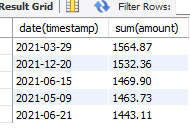




Exercici 3

En quin dia es van realitzar les cinc vendes de menor valor? Mostra la data de la transacció i la sumatòria de la quantitat de diners.
```
SELECT date(timestamp), SUM(amount)
FROM transaction
GROUP BY date(timestamp)
ORDER BY SUM(amount) ASC
LIMIT 5;
```
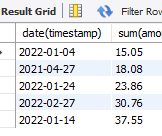


Exercici 4

Quina és la mitjana de despesa per país? Presenta els resultats ordenats de major a menor mitjà.
```
SELECT country, AVG(amount)
FROM company
JOIN 
transaction
ON company.id=transaction.company_id
GROUP BY country
ORDER BY AVG(amount) DESC;
```
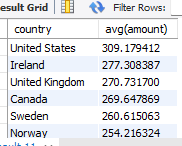



Nivell 3
Exercici 1

Presenta el nom, telèfon i país de les companyies, juntament amb la quantitat total gastada, d'aquelles que van realitzar transaccions amb una despesa compresa entre 100 i 200 euros. Ordena els resultats de major a menor quantitat gastada.
```
SELECT company_name, phone, country, amount
FROM company
JOIN 
transaction
ON company.id=transaction.company_id
WHERE amount BETWEEN 100 AND 200
ORDER BY amount DESC;
```
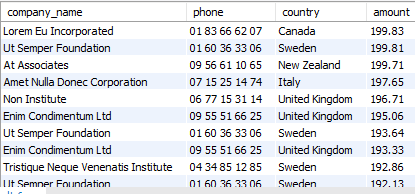


Exercici 2

Indica el nom de les companyies que van fer compres el 16 de març del 2022, 28 de febrer del 2022 i 13 de febrer del 2022. 
```
SELECT company_name
FROM company
JOIN 
transaction
ON company.id=transaction.company_id
WHERE date(timestamp) IN ("2022-03-16","2022-02-28","2022-02-13")
GROUP BY company_name;
```
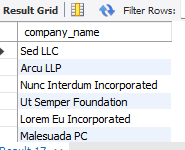

